In [1]:
from graphviz import Digraph

In [2]:
# cohort_properties = {"icd10":new_dx.ENC_HN.nunique(),
#                      "med": new_med.ENC_HN.nunique(),
#                      "icd10_only":len(data[data.flag=="icd"]),
#                      "both":len(data[data.flag=="both"]),
#                      "anti_h_only":len(data[data.flag=="med"]),
#                      "other_indication":sum(med_only["check2"]>0),
#                      "dx":new_dx.ENC_HN.nunique(),
#                      "infer_dx":len(final_data[final_data.flag=="med"]),
#                      "ht":len(final_data),
#                      "final_icd10_only":len(final_data[final_data.flag=="icd"]),
#                      "final_both":len(final_data[final_data.flag=="both"]),
#                      "final_anti_h_only":len(final_data[final_data.flag=="med"])}

In [3]:
cohort_properties = {"icd10": 223478,
                     "med": 235586,
                     "icd10_only": 65789,
                     "both": 157689,
                     "anti_h_only": 77897,
                     "other_indication": 14234,
                     "dx": 223478,
                     "infer_dx": 63663,
                     "ht": 287141,
                     "final_icd10_only": 0,
                     "final_both": 0,
                     "final_anti_h_only": 0}

In [4]:
print("For the flow chart")
print("===========================")
print("ICD 10 for Hypertension (HT): n = {:,} | Anti-Hypertensive medication (Anti-H): n = {:,}".format(cohort_properties["icd10"], cohort_properties["med"]))
print("======tentative groups=====")
print("ICD-10 only: n = {:,}".format(cohort_properties["icd10_only"]), end=" | ")
print("both ICD-10 and Anti-H: n = {:,}".format(cohort_properties["both"]), end=" | ")
print("Anti-H only: n = {:,}".format(cohort_properties["anti_h_only"]))
print("======med only=============")
print("other indications: n = {:,}".format(cohort_properties["other_indication"]))
print("======final merge==========")
print("Diagnosis of HT: n = {:,} | Inferred Diagnosis of HT: n = {:,} ".format(cohort_properties["dx"], cohort_properties["infer_dx"]))
print("HT subjects: n = {:,}".format(cohort_properties["ht"]))
print("======sub-groups===========")
print("ICD-10 only: n = {:,}".format(cohort_properties["final_icd10_only"]), end=" | ")
print("both ICD-10 and Anti-H: n = {:,}".format(cohort_properties["final_both"]), end=" | ")
print("Anti-H only: n = {:,}".format(cohort_properties["final_anti_h_only"]))

For the flow chart
ICD 10 for Hypertension (HT): n = 223,478 | Anti-Hypertensive medication (Anti-H): n = 235,586
======tentative groups=====
ICD-10 only: n = 65,789 | both ICD-10 and Anti-H: n = 157,689 | Anti-H only: n = 77,897
======med only=============
other indications: n = 14,234
======final merge==========
Diagnosis of HT: n = 223,478 | Inferred Diagnosis of HT: n = 63,663 
HT subjects: n = 287,141
======sub-groups===========
ICD-10 only: n = 0 | both ICD-10 and Anti-H: n = 0 | Anti-H only: n = 0


In [48]:
def ht_flow(cohort_properties=cohort_properties, study_period="01/2010 - 06/2023", dpi=0):
    # properties
    dot= Digraph(graph_attr={'rankdir': 'TB', 'splines': 'ortho', 'size': '20, 32', 'dpi': str(dpi)},
                node_attr={'shape': 'box', 
                            'width': '1.8', 'height': '0.8', 'fixedsize': 'true',
                            'fontname':'Helvetica', 'fontsize':'10', 'fontcolor':'black'})  # Top to bottom directed graph

    split_node = {'shape': 'point', 'label': None, 
                'width': '0.0001', 'height': '0.0001'}

    # nodes

    dot.node('A', 'Ramathibodi Hospital\nDatabase', _attributes={'shape': 'cylinder'})
    dot.node('1', _attributes=split_node)
        
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('B', 'Diagnosis\n{}\n(ICD-10)'.format(study_period))
        s.node('C', 'Prescription\n{}\n(Rama Drugcode)'.format(study_period))

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('D', 'ICD-10 for\nHypertension (HT)\n(n = {:,})'.format(cohort_properties["icd10"]))
        s.node('E', 'Anti-Hypertension\nmedication (Anti-H)\n(n = {:,})'.format(cohort_properties["med"]))

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('2', _attributes=split_node)
        s.node('3', _attributes=split_node)

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('F', 'ICD-10 only\n(n = {:,})'.format(cohort_properties["icd10_only"]))
        s.node('G', 'both ICD-10\nand Anti-H\n(n = {:,})'.format(cohort_properties["both"]))
        s.node('H', 'Anti-H only\n(n = {:,})'.format(cohort_properties["anti_h_only"]))
        
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('4', _attributes=split_node)
        s.node('J', 'Other condition\n(n = {:,})'.format(cohort_properties["other_indication"]))

    with dot.subgraph() as s:
        s.node('5', _attributes=split_node)

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('K', 'Diagnosis of HT\n(n = {:,})'.format(cohort_properties["dx"]))
        s.node('L', 'Inferred\nDiagnosis of HT\n(n = {:,})'.format(cohort_properties["infer_dx"]))

    with dot.subgraph() as s:
        s.node('6', _attributes=split_node)
        
    with dot.subgraph() as s:
        s.node('N', 'HT subjects\n(n = {:,})'.format(cohort_properties["ht"]))


    # arrows

    dot.edges(["AB", "AC"])

    dot.edge('B', 'D')
    dot.edge('C', 'E')

    dot.edge('D', '2', arrowhead='none')
    dot.edge('2', 'F')
    dot.edge('2', 'G')

    dot.edge('E', '3', arrowhead='none')
    dot.edge('3', 'G')
    dot.edge('3', 'H')

    dot.edge('H', '4', arrowhead='none')
    dot.edge('4', 'J', arrowhead='none')
    dot.edge('4', 'L')

    dot.edge('F', '5', arrowhead='none')
    dot.edge('G', '5', arrowhead='none')
    dot.edge('5', 'K')

    dot.edge('K', '6', arrowhead='none')
    dot.edge('L', '6', arrowhead='none')
    dot.edge('6', 'N')
    
    return dot

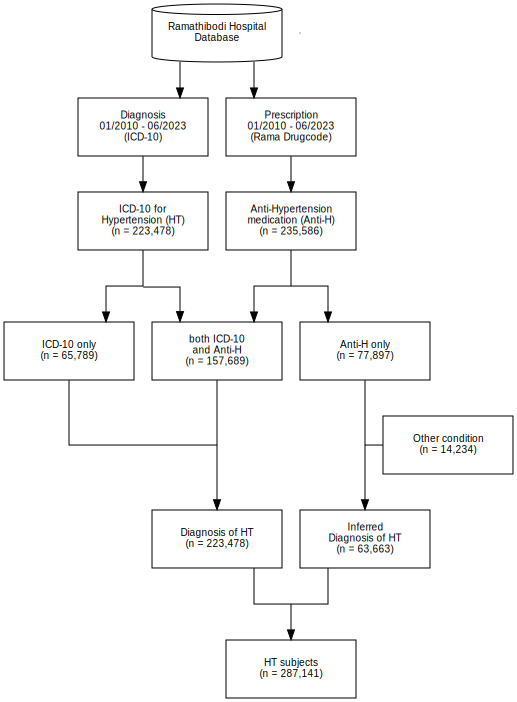

In [49]:
# Render the graph to a file and then display it
# dot.render('/mnt/data/flowchart_vertical.gv', format='png', cleanup=True)
dot = ht_flow()
dot

In [51]:
dot = ht_flow(dpi=300)
dot.render(r'G:\Shared drives\CEB data warehouse\3_HT\Flowchart\Cohort_2010_202306/graphviz', format='png', cleanup=True, view=True)

'G:\\Shared drives\\CEB data warehouse\\3_HT\\Flowchart\\Cohort_2010_202306\\graphviz.png'